In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

In [3]:
# 데이터 읽기
raw_data = pd.read_csv('linear_regression_data.csv', encoding='utf-8', engine='python')
raw_data.head()

,tall,weight,label
0,152.6,44.7,11.5
1,160.4,39.9,15.8
2,112.2,21.1,6.6
3,159.3,46.4,15.6
4,150.9,46.6,11.0


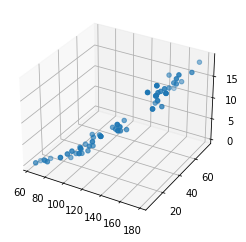

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

tall = raw_data['tall'].to_numpy()
weight = raw_data['weight'].to_numpy()
age = raw_data['label'].to_numpy()
ax.scatter(tall,weight,age)
plt.show()

In [5]:
# split raw data into X and label
X = raw_data[['tall', 'weight']].to_numpy()
X = np.c_[X, np.ones(80)]
y = raw_data['label'].to_numpy()
y = y.reshape(80,1)
print('X :',X)
print('y:', y)

X : [[152.6  44.7   1. ]
 [160.4  39.9   1. ]
 [112.2  21.1   1. ]
 [159.3  46.4   1. ]
 [150.9  46.6   1. ]
 [ 91.7  13.1   1. ]
 [ 74.8   8.    1. ]
 [111.1  16.1   1. ]
 [162.9  43.8   1. ]
 [131.3  27.6   1. ]
 [105.3  19.2   1. ]
 [177.8  61.7   1. ]
 [101.8  16.8   1. ]
 [151.5  49.    1. ]
 [ 86.2  11.    1. ]
 [137.8  23.7   1. ]
 [160.1  40.6   1. ]
 [119.9  21.2   1. ]
 [156.4  65.9   1. ]
 [154.7  48.1   1. ]
 [ 64.4   5.5   1. ]
 [ 67.5   7.7   1. ]
 [ 70.7   8.6   1. ]
 [162.1  49.4   1. ]
 [167.3  55.6   1. ]
 [155.   35.8   1. ]
 [ 70.7   8.6   1. ]
 [ 74.8   8.    1. ]
 [130.5  26.5   1. ]
 [ 91.7  13.1   1. ]
 [108.6  23.4   1. ]
 [160.1  40.6   1. ]
 [ 94.7  15.1   1. ]
 [ 95.3  13.2   1. ]
 [162.7  46.9   1. ]
 [131.6  35.1   1. ]
 [154.7  61.4   1. ]
 [ 64.4   5.5   1. ]
 [159.6  71.5   1. ]
 [115.6  24.2   1. ]
 [ 72.2   8.3   1. ]
 [124.6  29.4   1. ]
 [134.5  27.8   1. ]
 [171.3  53.6   1. ]
 [162.1  49.4   1. ]
 [155.   35.8   1. ]
 [ 76.7   9.7   1. ]
 [159.6  

In [6]:
analytic_W = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print(analytic_W)

[[  0.16248137]
 [  0.01980255]
 [-12.27584624]]


GD

In [7]:
def numerucal_gradient(f,W,X,y):
    h = 1e-4
    grad = np.zeros_like(W)
    for idx in range(W.size):
        tmp_val = W[idx]
        # f(x+h)
        W[idx] = tmp_val+h
        fxh1 = f(W,X,y)

        # f(x-h)
        W[idx] = tmp_val-h
        fxh2 = f(W,X,y)    

        grad[idx] = (fxh1-fxh2)/(2*h)
        W[idx] = tmp_val
    return grad

In [40]:
GD_W = np.zeros((3,1))
GD_W[0] = np.random.uniform(low=-10.0, high=10.0)
GD_W[1] = np.random.uniform(low=-10.0, high=10.0)
GD_W[2] = np.random.uniform(low=-10.0, high=10.0)
print(GD_W)

def fucntion_MSE(W,X,y):
    mse = np.zeros(len(X))
    for idx in range(len(X)):
        mse[idx] = (np.dot(W.T,X[idx])-y[idx])**2
    mse = np.sum(mse)/len(X)
    return mse

print(numerucal_gradient(fucntion_MSE, GD_W, X, y))
print(numerucal_gradient(fucntion_MSE, analytic_W, X, y))

[[-4.49659914]
 [-0.98732462]
 [ 4.69393739]]
[[-81560.24752854]
 [-21421.83474731]
 [  -602.86963155]]
[[8.50395425e-01]
 [6.40876688e-02]
 [5.00000008e-05]]


In [41]:
# 1차 GD
num_epoch=20000
eta = 0.00001

for epoch in range(num_epoch):
    mse = fucntion_MSE(GD_W, X, y)
    if mse < 0.00001:
        print('GD를 종료합니다.')
        break
    GD_W = GD_W - eta*numerucal_gradient(fucntion_MSE,GD_W,X,y)

    if epoch%10 == 0:
        print(f'epoch:{epoch} ========================> W:{GD_W.flatten()}, mse:{mse}')


epoch:0 ========================> W:[-3.68099667 -0.77310627  4.69996608], mse:391345.5727940948
epoch:10 ========================> W:[-0.50294561  0.0625205   4.72341707], mse:7099.958627755591
epoch:20 ========================> W:[-0.07553688  0.17618062  4.72651409], mse:139.10775525269125
epoch:30 ========================> W:[-0.01832332  0.19265981  4.72687202], mse:12.877878476695297
epoch:40 ========================> W:[-0.01092933  0.19604586  4.72686159], mse:10.539101034967919
epoch:50 ========================> W:[-0.01023676  0.197656    4.72680186], mse:10.457618752098998
epoch:60 ========================> W:[-0.01044255  0.19901354  4.72673577], mse:10.419553901545985
epoch:70 ========================> W:[-0.01076573  0.20032365  4.72666909], mse:10.383352270651738
epoch:80 ========================> W:[-0.01110122  0.2016141   4.7266026 ], mse:10.348048316597708
epoch:90 ========================> W:[-0.01143492  0.20288879  4.7265364 ], mse:10.313579034304158
epoch:100 ===

In [42]:
# 2차 GD
num_epoch=5000
eta = 0.0005

for epoch in range(num_epoch):
    mse = fucntion_MSE(GD_W, X, y)
    if mse < 0.00001:
        print('GD를 종료합니다.')
        break
    GD_W = GD_W - eta*numerucal_gradient(fucntion_MSE,GD_W,X,y)

    if epoch%10 == 0:
        print(f'epoch:{epoch} ========================> W:{GD_W.flatten()}, mse:{mse}')

epoch:0 ========================> W:[-0.0385736   0.30862556  4.64362479], mse:8.826561095652595
epoch:10 ========================> W:[-0.03854991  0.3085912   4.64160673], mse:8.82489517102567
epoch:20 ========================> W:[-286.08406142  -74.76856007    2.52290173], mse:24307979.784496985
epoch:30 ========================> W:[-3.33387745e+11 -9.61603338e+10 -3.71684153e+07], mse:3.4986120872404403e+25
epoch:40 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:50 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:60 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:70 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:80 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:90 ==

In [45]:
# 3차 GD
num_epoch=5000
eta = 0.5

for epoch in range(num_epoch):
    mse = fucntion_MSE(GD_W, X, y)
    if mse < 0.00001:
        print('GD를 종료합니다.')
        break
    GD_W = GD_W - eta*numerucal_gradient(fucntion_MSE,GD_W,X,y)

    if epoch%10 == 0:
        print(f'epoch:{epoch} ========================> W:{GD_W.flatten()}, mse:{mse}')

epoch:0 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:10 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:20 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:30 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:40 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:50 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:60 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:70 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153e+07], mse:3.1526449723358912e+29
epoch:80 ========================> W:[ 3.78978086e+12  1.96542397e+12 -3.71684153